In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from random import sample

In [10]:
train = {}
test = {}

path = "C://coding/Food Classification/input/food11-image-dataset"

In [11]:
# Make dictionary storing images for each category under train data.
path_train = path +  "/training/"
for i in os.listdir(path_train):
    train[i] = os.listdir(path_train + f"/{i}")

# Make dictionary storing images for each category under test data.
path_test = path + "/validation/"
for i in os.listdir(path_test):
    test[i] = os.listdir(path_test + f"/{i}")

In [12]:
# View the number of images in the entire training and testing datasets respectively.
len_train = np.concatenate(list(train.values())).shape[0]
len_test = np.concatenate(list(test.values())).shape[0]

print("Number of images in training data : {}".format(len_train))
print("Number of images in testing data : {}".format(len_test))

Number of images in training data : 9866
Number of images in testing data : 3430


[[], [], Text(0.5, 0, 'Bread')]

[[], [], Text(0.5, 0, 'Bread')]

[[], [], Text(0.5, 0, 'Bread')]

[[], [], Text(0.5, 0, 'Bread')]

[[], [], Text(0.5, 0, 'Bread')]

[[], [], Text(0.5, 0, 'Dairy product')]

[[], [], Text(0.5, 0, 'Dairy product')]

[[], [], Text(0.5, 0, 'Dairy product')]

[[], [], Text(0.5, 0, 'Dairy product')]

[[], [], Text(0.5, 0, 'Dairy product')]

[[], [], Text(0.5, 0, 'Dessert')]

[[], [], Text(0.5, 0, 'Dessert')]

[[], [], Text(0.5, 0, 'Dessert')]

[[], [], Text(0.5, 0, 'Dessert')]

[[], [], Text(0.5, 0, 'Dessert')]

[[], [], Text(0.5, 0, 'Egg')]

[[], [], Text(0.5, 0, 'Egg')]

[[], [], Text(0.5, 0, 'Egg')]

[[], [], Text(0.5, 0, 'Egg')]

[[], [], Text(0.5, 0, 'Egg')]

[[], [], Text(0.5, 0, 'Fried food')]

[[], [], Text(0.5, 0, 'Fried food')]

[[], [], Text(0.5, 0, 'Fried food')]

[[], [], Text(0.5, 0, 'Fried food')]

[[], [], Text(0.5, 0, 'Fried food')]

[[], [], Text(0.5, 0, 'Meat')]

[[], [], Text(0.5, 0, 'Meat')]

[[], [], Text(0.5, 0, 'Meat')]

[[], [], Text(0.5, 0, 'Meat')]

[[], [], Text(0.5, 0, 'Meat')]

[[], [], Text(0.5, 0, 'Noodles-Pasta')]

[[], [], Text(0.5, 0, 'Noodles-Pasta')]

[[], [], Text(0.5, 0, 'Noodles-Pasta')]

[[], [], Text(0.5, 0, 'Noodles-Pasta')]

[[], [], Text(0.5, 0, 'Noodles-Pasta')]

[[], [], Text(0.5, 0, 'Rice')]

[[], [], Text(0.5, 0, 'Rice')]

[[], [], Text(0.5, 0, 'Rice')]

[[], [], Text(0.5, 0, 'Rice')]

[[], [], Text(0.5, 0, 'Rice')]

[[], [], Text(0.5, 0, 'Seafood')]

[[], [], Text(0.5, 0, 'Seafood')]

[[], [], Text(0.5, 0, 'Seafood')]

[[], [], Text(0.5, 0, 'Seafood')]

[[], [], Text(0.5, 0, 'Seafood')]

[[], [], Text(0.5, 0, 'Soup')]

[[], [], Text(0.5, 0, 'Soup')]

[[], [], Text(0.5, 0, 'Soup')]

[[], [], Text(0.5, 0, 'Soup')]

[[], [], Text(0.5, 0, 'Soup')]

[[], [], Text(0.5, 0, 'Vegetable-Fruit')]

[[], [], Text(0.5, 0, 'Vegetable-Fruit')]

[[], [], Text(0.5, 0, 'Vegetable-Fruit')]

[[], [], Text(0.5, 0, 'Vegetable-Fruit')]

[[], [], Text(0.5, 0, 'Vegetable-Fruit')]

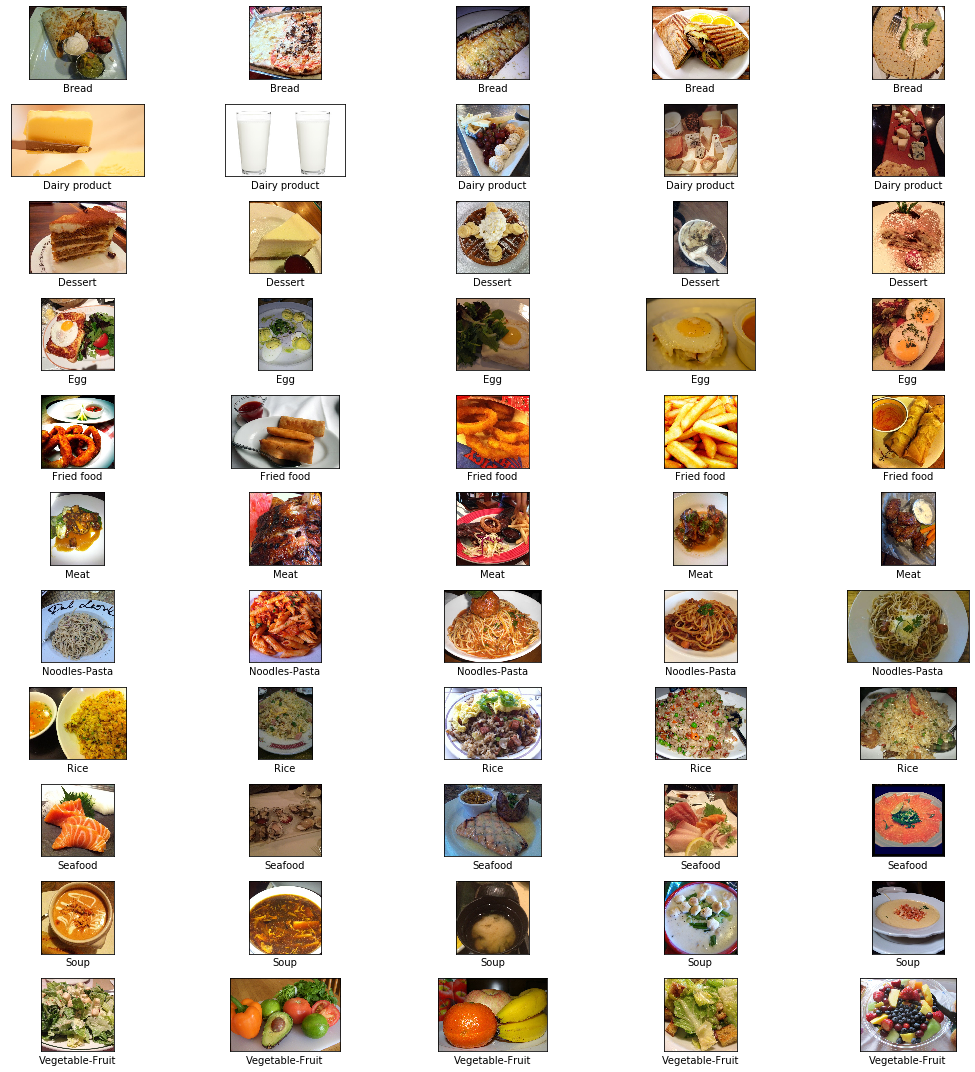

In [18]:
# Randomly display 5 images under each of the 6 categories from the training data.
# You will see different images each time.
fig, axs = plt.subplots(len(train.keys()), 5, figsize = (15, 15))
for i, item in enumerate(os.listdir(path_train)):
    images = sample(train[item], 5)
    
    for j, image in enumerate(images):
        img = PIL.Image.open(os.path.join(path_train, item, image))
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel = item, xticks = [], yticks = [])

fig.tight_layout()

In [14]:
for item in train.keys():
    print(item, len(train[item]))

Bread 994
Dairy product 429
Dessert 1500
Egg 986
Fried food 848
Meat 1325
Noodles-Pasta 440
Rice 280
Seafood 855
Soup 1500
Vegetable-Fruit 709


([<matplotlib.patches.Wedge at 0x2964fba9648>,
 [Text(1.0453582948202247, 0.34238287844247156, 'Bread'),
  Text(0.7899803590547807, 0.7654613199291522, 'Dairy product'),
  Text(0.20441264189672018, 1.080840169420439, 'Dessert'),
  Text(-0.6253589264297535, 0.9049454199754957, 'Egg'),
  Text(-1.0206673190134172, 0.4101685310917495, 'Fried food'),
  Text(-1.047624415633295, -0.3353849784486441, 'Meat'),
  Text(-0.7077518621010451, -0.8420732163490912, 'Noodles-Pasta'),
  Text(-0.4978597152232124, -0.9808851634915589, 'Rice'),
  Text(-0.11885889122409933, -1.0935595841000059, 'Seafood'),
  Text(0.6583511408606703, -0.8812342340873135, 'Soup'),
  Text(1.0720856568709194, -0.2462363586711956, 'Vegetable-Fruit')],
 [Text(0.5701954335383044, 0.18675429733225718, '10.1%'),
  Text(0.43089837766624395, 0.41752435632499213, '4.3%'),
  Text(0.11149780467093827, 0.5895491833202394, '15.2%'),
  Text(-0.3411048689616837, 0.4936065927139067, '10.0%'),
  Text(-0.5567276285527729, 0.2237282896864088, '8

C:\Users\chdan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


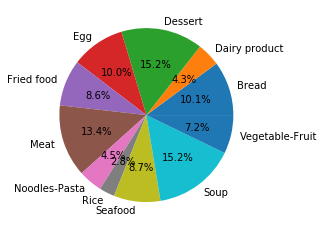

In [24]:
fig, ax = plt.subplots()
ax.pie(
    [len(train[item]) for item in train],
    labels = train.keys(),
    autopct = "%1.1f%%"
)
fig.show()

In [25]:
# Create an Image Generator and specify the type of data augmentation you want to apply.
# Here we go with zooming, flipping (horizontally and vertically), and rescaling.
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale=1./255
)

# For test data we only rescale the data.
# Never augment test data!!!
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# Create a generator for the images. 
# This will make images (including augmented ones) start flowing from the directory to the model.
# Note that augmented images are not stored along with the original images. The process happens in memory.

# Train generator
train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    path_test,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [27]:
# Load the inception resnetv2 model
basemodel = InceptionResNetV2(
    weights = "imagenet",
    include_top = False, # Classification layer (output layer- sigmoid activations)
    input_tensor = Input((256, 256, 3))
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
219062272/219055592 [==============================] - 39s 0us/step


In [28]:
# print the model summary
basemodel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

__________________________________________________________________________________________________
block8_1_mixed (Concatenate)    (None, 6, 6, 448)    0           activation_163[0][0]             
                                                                 activation_166[0][0]             
__________________________________________________________________________________________________
block8_1_conv (Conv2D)          (None, 6, 6, 2080)   933920      block8_1_mixed[0][0]             
__________________________________________________________________________________________________
block8_1 (Lambda)               (None, 6, 6, 2080)   0           mixed_7a[0][0]                   
                                                                 block8_1_conv[0][0]              
__________________________________________________________________________________________________
block8_1_ac (Activation)        (None, 6, 6, 2080)   0           block8_1[0][0]                   
__________

In [29]:
basemodel.trainable = False

In [30]:
# Add classification head to the model
headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = "Global_Average_Pool")(headmodel)
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(256, activation = "relu", name = "dense_1")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu", name = "dense_2")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(11, activation = "softmax", name = "output")(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [31]:
# Compile the model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = SGD(
        lr = 0.01,
        momentum = 0.9
    ),
    metrics = ["accuracy"]
)

In [33]:

earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 20
)

# save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights.hdf5", 
    verbose = 1, 
    save_best_only = True
)

In [34]:
history = model.fit(
    train_generator, 
    steps_per_epoch = train_generator.n // 32, 
    epochs = 1,  
    callbacks = [checkpointer, earlystopping]
)

308/308 [==============================] - 3379s 11s/step - loss: 1.6249 - acc: 0.4547


In [35]:
basemodel.trainable = True

In [36]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 20
)

# Save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights_fine.hdf5", 
    verbose = 1, 
    save_best_only = True
)

In [37]:
# fine tune the model with very low learning rate
history = model.fit(
    train_generator, 
    steps_per_epoch = train_generator.n // 32, 
    epochs = 5, 
    callbacks = [checkpointer, earlystopping]
)

Epoch 1/5
308/308 [==============================] - 3273s 11s/step - loss: 1.2019 - acc: 0.6073
Epoch 2/5
308/308 [==============================] - 3425s 11s/step - loss: 1.0913 - acc: 0.6441
Epoch 3/5
308/308 [==============================] - 3410s 11s/step - loss: 1.0230 - acc: 0.6678
Epoch 4/5
308/308 [==============================] - 5263s 17s/step - loss: 0.9783 - acc: 0.6812
Epoch 5/5
308/308 [==============================] - 8292s 27s/step - loss: 0.9617 - acc: 0.6877


In [39]:
# Evaluate the performance of the model
evaluate = model.evaluate_generator(
    test_generator, 
    steps = test_generator.n // 32, 
    verbose = 1
)

print('Accuracy Test : {}'.format(evaluate[1]))

107/107 [==============================] - 639s 6s/step - loss: 0.9612 - acc: 0.7354
Accuracy Test : 0.735397219657898


In [40]:
# Assigning label names to the corresponding indexes
labels = {
    0: 'Bread', 
    1: 'Dairy product', 
    2: 'Dessert', 
    3: 'Egg', 
    4: 'Fried food', 
    5: 'Meat',
    6: 'Noodles-Pasta',
    7: 'Rice', 
    8: 'Seafood',
    9: 'Soup',
    10: 'Vegetable-Fruit'
}

In [42]:
# Loading images and their predictions 
prediction = []
original = []
image = []
count = 0
# path_eval = "../input/food11-image-dataset/evaluation"
path_eval = "C://coding/Food Classification/input/food11-image-dataset/evaluation"
for i in os.listdir(path_eval):
    for item in os.listdir(os.path.join(path_eval, i)):
        #code to open the image
        img= PIL.Image.open(os.path.join(path_eval, i, item))
        #resizing the image to (256,256)
        img = img.resize((256,256))
        #appending image to the image list
        image.append(img)
        #converting image to array
        img = np.asarray(img, dtype= np.float32)
        #normalizing the image
        img = img / 255
        #reshaping the image in to a 4D array
        img = img.reshape(-1,256,256,3)
        #making prediction of the model
        predict = model.predict(img)
        #getting the index corresponding to the highest value in the prediction
        predict = np.argmax(predict)
        #appending the predicted class to the list
        prediction.append(labels[predict])
        #appending original class to the list
        original.append(i)

Text(0.5, 0, 'Prediction -Bread   Original -Seafood')

Text(0.5, 0, 'Prediction -Egg   Original -Egg')

Text(0.5, 0, 'Prediction -Fried food   Original -Bread')

Text(0.5, 0, 'Prediction -Rice   Original -Rice')

Text(0.5, 0, 'Prediction -Dessert   Original -Dessert')

Text(0.5, 0, 'Prediction -Soup   Original -Soup')

Text(0.5, 0, 'Prediction -Bread   Original -Bread')

Text(0.5, 0, 'Prediction -Meat   Original -Meat')

Text(0.5, 0, 'Prediction -Egg   Original -Bread')

Text(0.5, 0, 'Prediction -Soup   Original -Soup')

Text(0.5, 0, 'Prediction -Meat   Original -Meat')

Text(0.5, 0, 'Prediction -Meat   Original -Meat')

Text(0.5, 0, 'Prediction -Meat   Original -Meat')

Text(0.5, 0, 'Prediction -Seafood   Original -Seafood')

Text(0.5, 0, 'Prediction -Egg   Original -Egg')

Text(0.5, 0, 'Prediction -Soup   Original -Soup')

Text(0.5, 0, 'Prediction -Soup   Original -Soup')

Text(0.5, 0, 'Prediction -Meat   Original -Meat')

Text(0.5, 0, 'Prediction -Soup   Original -Soup')

Text(0.5, 0, 'Prediction -Fried food   Original -Fried food')

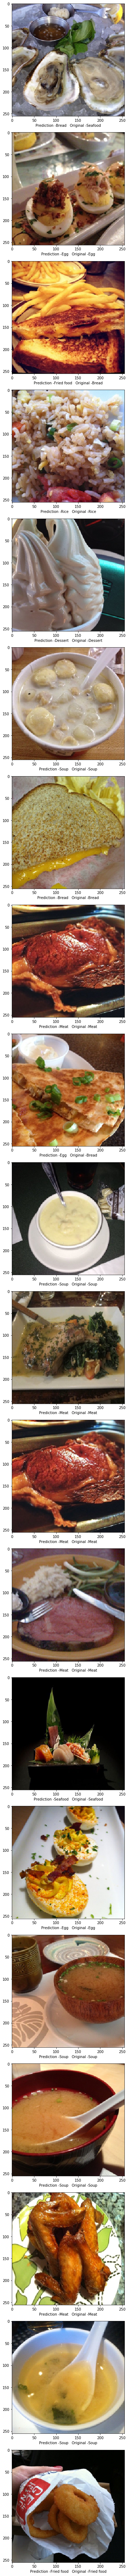

In [43]:
# Visualizing the results
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [44]:
# Check out the Classification Report 
print(classification_report(np.asarray(prediction), np.asarray(original)))

# Based on these values, you can try t improve your model.
# For the sake of simplicity, hyperparameter tuning and model improvement was not done.

                 precision    recall  f1-score   support

          Bread       0.68      0.70      0.69       359
  Dairy product       0.39      0.87      0.54        67
        Dessert       0.59      0.87      0.71       339
            Egg       0.84      0.46      0.60       614
     Fried food       0.62      0.83      0.71       212
           Meat       0.89      0.66      0.76       583
  Noodles-Pasta       0.99      0.94      0.96       154
           Rice       0.89      0.93      0.91        91
        Seafood       0.53      0.89      0.66       180
           Soup       0.97      0.89      0.93       546
Vegetable-Fruit       0.81      0.93      0.87       202

       accuracy                           0.75      3347
      macro avg       0.75      0.82      0.76      3347
   weighted avg       0.80      0.75      0.75      3347



<Figure size 504x360 with 0 Axes>

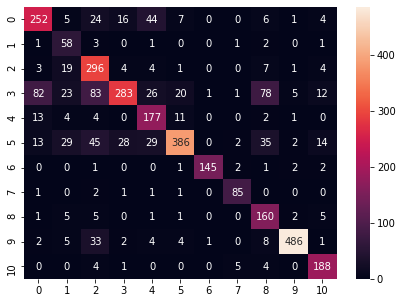

In [45]:
# View the 6x6 confusion matrix
plt.figure(figsize = (7, 5))
cm = confusion_matrix(np.asarray(prediction), np.asarray(original))
sns.heatmap(
    cm, 
    annot = True, 
    fmt = "d"
)
plt.show()